In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

C:\Users\Fani\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
path1 = 'refinery/'
path2 = 'temperature/'
ref_files = os.listdir(path1)
temp_files = os.listdir(path2)

In [3]:
months = ['فروردین','اردیبهشت','خرداد','تیر','مرداد','شهریور','مهر','آبان','آذر','دی','بهمن','اسفند']
d_temp = pd.DataFrame([])
for i in range(5):
    for name in months:
        d = pd.read_excel(os.path.join(path2,temp_files[i]),sheet_name=name)
        d = d[d.columns[[0,2]]]
        d_temp = pd.concat((d_temp,d))

In [4]:
d_ref = pd.DataFrame([])
for i in range(5):
    for name in months:
        d = np.transpose(pd.read_excel(os.path.join(path1,ref_files[i]),sheet_name=name))
        d.columns = d.iloc[0]
        d.drop(index='Unnamed: 0',inplace=True)
        d_ref = pd.concat((d_ref,d))

In [5]:
d_ref.index = np.arange(0,len(d_ref.index))
d_temp.index = d_ref.index
data = pd.concat((d_temp,d_ref),axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 0 to 1825
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   تاریخ                                                  1826 non-null   object 
 1   دمای میانگین
(ċ)                                       1826 non-null   float64
 2   دبي آب ورودي تصفيه خانه (مترمكعب)                      1814 non-null   object 
 3   دبي خروجي تصفيه خانه (مترمكعب)                         1814 non-null   object 
 4   كدورت آب ورودي در 95 درصد شرايط (NTU)                  1814 non-null   object 
 5   حداكثر كدورت (آب ورودي) (NTU)                          1814 non-null   object 
 6   مدت زمان كدورت حداكثر(آب ورودي)                        1814 non-null   object 
 7   كدورت آب تصفيه (NTU)                                   1807 non-null   object 
 8   مصرف مواد منعقد كننده اوليه -خالص (كيلوگرم)          

In [6]:
data

,تاریخ,دمای میانگین\n(ċ),دبي آب ورودي تصفيه خانه (مترمكعب),دبي خروجي تصفيه خانه (مترمكعب),كدورت آب ورودي در 95 درصد شرايط (NTU),حداكثر كدورت (آب ورودي) (NTU),مدت زمان كدورت حداكثر(آب ورودي),كدورت آب تصفيه (NTU),مصرف مواد منعقد كننده اوليه -خالص (كيلوگرم),كل جامدات محلول (TDS)-آب خام ورودي (ميلي گرم بر ليتر),كل جامدات محلول (TDS)-آب تصفيه (ميلي گرم بر ليتر)
0,1398/1/1,9.1,3100,3040,350,700,05:00,0.8,15.48,393,393
1,1398/1/2,9.9,3070,3010,550,1500,04:00,0.85,20.64,390,390
2,1398/1/3,11.9,3500,3440,750,2000,05:00,0.8,25.8,377,377
3,1398/1/4,14.8,3000,2940,1800,2500,07:00,0.85,25.8,500,500
4,1398/1/5,12.4,3800,3740,1700,2500,05:00,0.8,22.36,450,450
...,...,...,...,...,...,...,...,...,...,...,...
1821,1402/12/25,14.8,6700,6600,650,740,04:00,1.2,14.5,1500,1505
1822,1402/12/26,16.6,6700,6600,650,740,04:00,1.2,14.5,1500,1505
1823,1402/12/27,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1824,1402/12/28,16.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
years = ['1398','1399','1400','1401','1402']
d_rain = pd.DataFrame([])
for year in years:
    d = np.transpose(pd.read_excel('آمار بارندگی روزانه.xlsx',sheet_name=year))
    d.drop(columns=d.columns[0:3],inplace=True)
    for col in d.columns:
        d_rain = pd.concat((d_rain,d[col][1:-1]),axis=1)
d_rain = pd.Series(d_rain.to_numpy().reshape((d_rain.size,),order='F'))
ind = np.where(d_rain.isnull())[0]
d_rain.index = np.arange(0,d_rain.shape[0])
d_rain.drop(index=ind,inplace=True)

In [44]:
d_rain.index = data.index
data = pd.concat((data,d_rain),axis=1)

In [46]:
col_names = list(data.columns)
col_names[-1] = 'بارندگی'
data.columns = col_names

In [47]:
data

,تاریخ,دمای میانگین\n(ċ),دبي آب ورودي تصفيه خانه (مترمكعب),دبي خروجي تصفيه خانه (مترمكعب),كدورت آب ورودي در 95 درصد شرايط (NTU),حداكثر كدورت (آب ورودي) (NTU),مدت زمان كدورت حداكثر(آب ورودي),كدورت آب تصفيه (NTU),مصرف مواد منعقد كننده اوليه -خالص (كيلوگرم),كل جامدات محلول (TDS)-آب خام ورودي (ميلي گرم بر ليتر),كل جامدات محلول (TDS)-آب تصفيه (ميلي گرم بر ليتر),بارندگی
0,1398/1/1,9.1,3100,3040,350,700,05:00,0.8,15.48,393,393,0
1,1398/1/2,9.9,3070,3010,550,1500,04:00,0.85,20.64,390,390,0.0
2,1398/1/3,11.9,3500,3440,750,2000,05:00,0.8,25.8,377,377,0.0
3,1398/1/4,14.8,3000,2940,1800,2500,07:00,0.85,25.8,500,500,0.0
4,1398/1/5,12.4,3800,3740,1700,2500,05:00,0.8,22.36,450,450,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1402/12/25,14.8,6700,6600,650,740,04:00,1.2,14.5,1500,1505,0.0
1822,1402/12/26,16.6,6700,6600,650,740,04:00,1.2,14.5,1500,1505,0.0
1823,1402/12/27,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1824,1402/12/28,16.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [48]:
data.fillna(method='ffill',inplace=True)

C:\Users\Fani\AppData\Local\Temp\ipykernel_13712\286314875.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill',inplace=True)
C:\Users\Fani\AppData\Local\Temp\ipykernel_13712\286314875.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(method='ffill',inplace=True)


In [49]:
data[['دمای میانگین\n(ċ)','بارندگی']]

,دمای میانگین\n(ċ),بارندگی
0,9.1,0.0
1,9.9,0.0
2,11.9,0.0
3,14.8,0.0
4,12.4,16.0
...,...,...
1821,14.8,0.0
1822,16.6,0.0
1823,15.8,0.0
1824,16.8,0.0


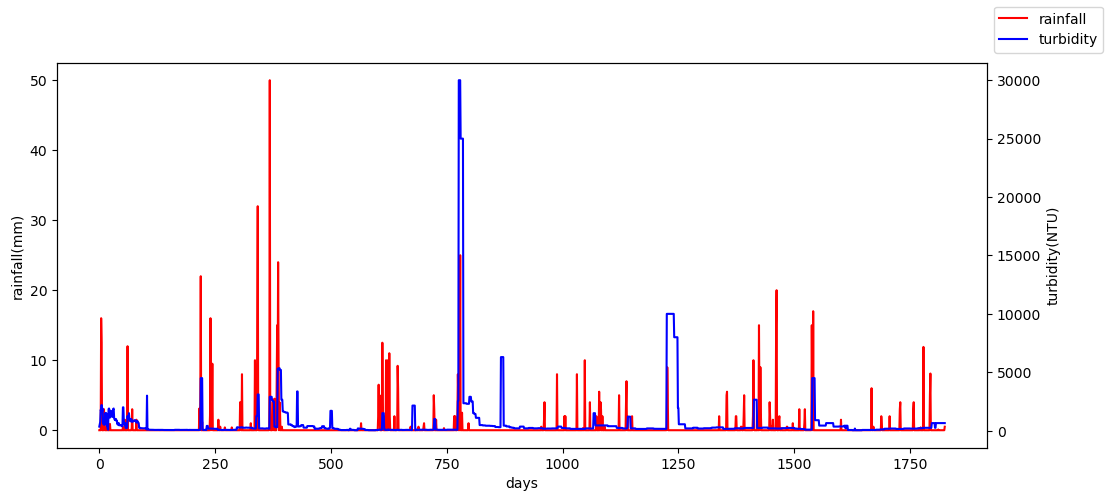

In [50]:
fig,ax1 = plt.subplots(figsize=[12,5])
ax1.plot(data['بارندگی'],color='red',label='rainfall')
ax1.set_xlabel('days')
ax1.set_ylabel('rainfall(mm)')
ax2 = ax1.twinx()
ax2.plot(data['كدورت آب ورودي در 95 درصد شرايط (NTU)'],color='blue',label='turbidity')
ax2.set_ylabel('turbidity(NTU)')
fig.legend()

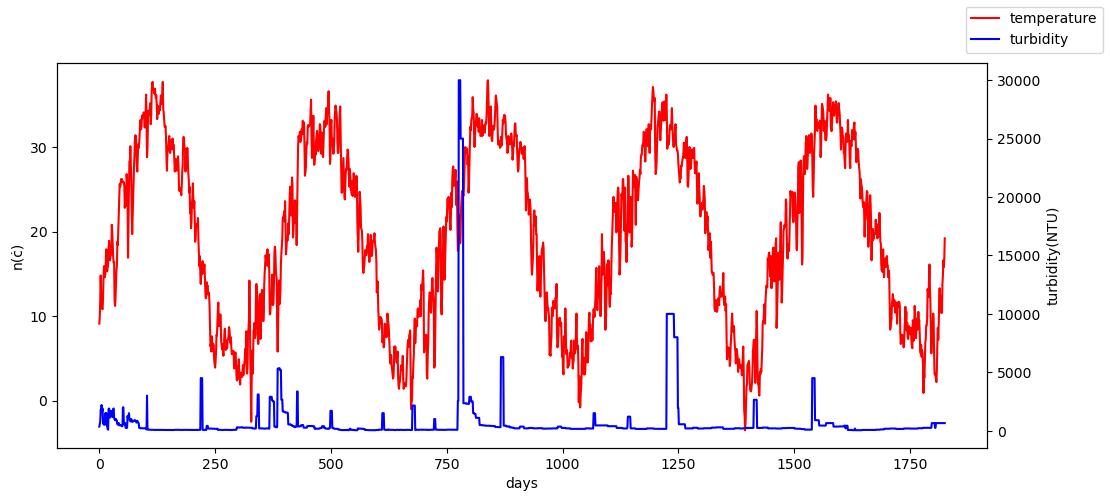

In [51]:
fig,ax1 = plt.subplots(figsize=[12,5])
ax1.plot(data['دمای میانگین\n(ċ)'],color='red',label='temperature')
ax1.set_xlabel('days')
ax1.set_ylabel('n(ċ)')
ax2 = ax1.twinx()
ax2.plot(data['كدورت آب ورودي در 95 درصد شرايط (NTU)'],color='blue',label='turbidity')
ax2.set_ylabel('turbidity(NTU)')
fig.legend()

In [52]:
X = data['بارندگی']
y = data['كدورت آب ورودي در 95 درصد شرايط (NTU)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train.to_numpy().reshape(-1,1))
scaler.transform(X_test.to_numpy().reshape(-1,1))
neuralNetRegressor = MLPRegressor([200])
neuralNetRegressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = neuralNetRegressor.predict(X_test.to_numpy().reshape(-1,1))
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')


X = data[['دمای میانگین\n(ċ)','بارندگی']]
y = data['كدورت آب ورودي در 95 درصد شرايط (NTU)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
neuralNetRegressor = MLPRegressor([200])
neuralNetRegressor.fit(X_train,y_train)
y_pred = neuralNetRegressor.predict(X_test)
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

C:\Users\Fani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mean squared value is: 4209973.654506708 

r2 score is: -19.567621718456753

 
 mean squared value is: 4053261.0947038624 

r2 score is: -24.772794319530878


C:\Users\Fani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
d_temp_av = []
for i in range(5):
    for name in months:
        d = pd.read_excel(os.path.join(path2,temp_files[i]),sheet_name=name)
        d = d[d.columns[2]].mean()
        d_temp_av.append(d)
d_temp_av

[15.348387096774193,
 21.641935483870963,
 28.0,
 34.53870967741935,
 32.83870967741935,
 28.183870967741935,
 23.47333333333334,
 12.586666666666666,
 7.27,
 5.266666666666667,
 5.369999999999999,
 12.248275862068965,
 13.645161290322578,
 21.66774193548387,
 30.90645161290323,
 30.741935483870968,
 32.332258064516125,
 26.803225806451607,
 20.280000000000005,
 15.083333333333332,
 6.4366666666666665,
 3.9033333333333338,
 8.5,
 9.963333333333335,
 19.135483870967743,
 24.46129032258065,
 31.59354838709677,
 32.932258064516134,
 31.95806451612903,
 30.04516129032258,
 21.830000000000002,
 12.580000000000002,
 8.926666666666666,
 5.500000000000001,
 5.636666666666668,
 13.006896551724138,
 18.89354838709677,
 22.896774193548385,
 28.58709677419355,
 33.041935483870965,
 31.758064516129036,
 28.319354838709682,
 24.793333333333326,
 14.820000000000002,
 9.13,
 3.3833333333333333,
 4.0,
 14.43793103448276,
 17.45806451612903,
 23.54193548387097,
 30.180645161290318,
 33.17741935483871,
 

In [54]:
d_tur_av = []
for i in range(5):
    for name in months:
        d = np.transpose(pd.read_excel(os.path.join(path1,ref_files[i]),sheet_name=name))
        d.columns = d.iloc[0]
        d.drop(index='Unnamed: 0',inplace=True)
        d_tur_av.append(d[d.columns[2]].mean())

In [55]:
d_rain_av = []
for year in years:
    d = np.transpose(pd.read_excel('آمار بارندگی روزانه.xlsx',sheet_name=year))
    d.drop(columns=d.columns[0:3],inplace=True)
    for col in d.columns:
        d_rain_av.append(d[col][-1])

C:\Users\Fani\AppData\Local\Temp\ipykernel_13712\1055042494.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d_rain_av.append(d[col][-1])
C:\Users\Fani\AppData\Local\Temp\ipykernel_13712\1055042494.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d_rain_av.append(d[col][-1])
C:\Users\Fani\AppData\Local\Temp\ipykernel_13712\1055042494.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d_rain_av.append(d[col][-1])
C:\Users\Fani

In [56]:
data_av = pd.DataFrame()
data_av['کدورت متوسط'] = d_tur_av
data_av['دمای متوسط'] = d_temp_av
data_av['مجموع بارش'] = d_rain_av

In [57]:
data_av

,کدورت متوسط,دمای متوسط,مجموع بارش
0,1191.451613,15.348387,35.9
1,751.612903,21.641935,13.9
2,727.354839,28.000000,4.8
3,211.258065,34.538710,0.0
4,62.451613,32.838710,0.0
5,66.806452,28.183871,0.0
6,66.133333,23.473333,0.0
7,734.500000,12.586667,67.4
8,101.100000,7.270000,2.4
9,130.833333,5.266667,7.4


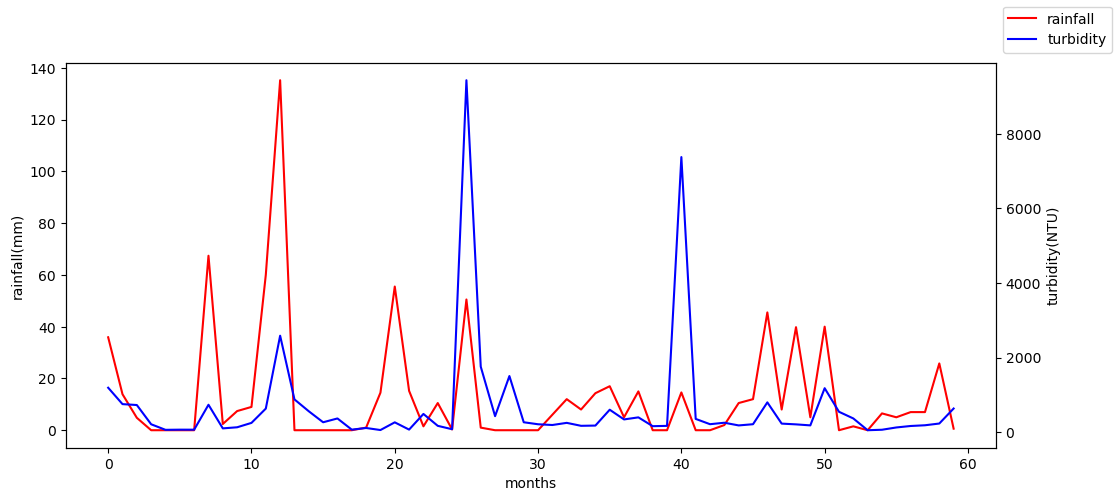

In [58]:
fig,ax1 = plt.subplots(figsize=[12,5])
ax1.plot(data_av['مجموع بارش'],color='red',label='rainfall')
ax1.set_xlabel('months')
ax1.set_ylabel('rainfall(mm)')
ax2 = ax1.twinx()
ax2.plot(data_av['کدورت متوسط'],color='blue',label='turbidity')
ax2.set_ylabel('turbidity(NTU)')
fig.legend()

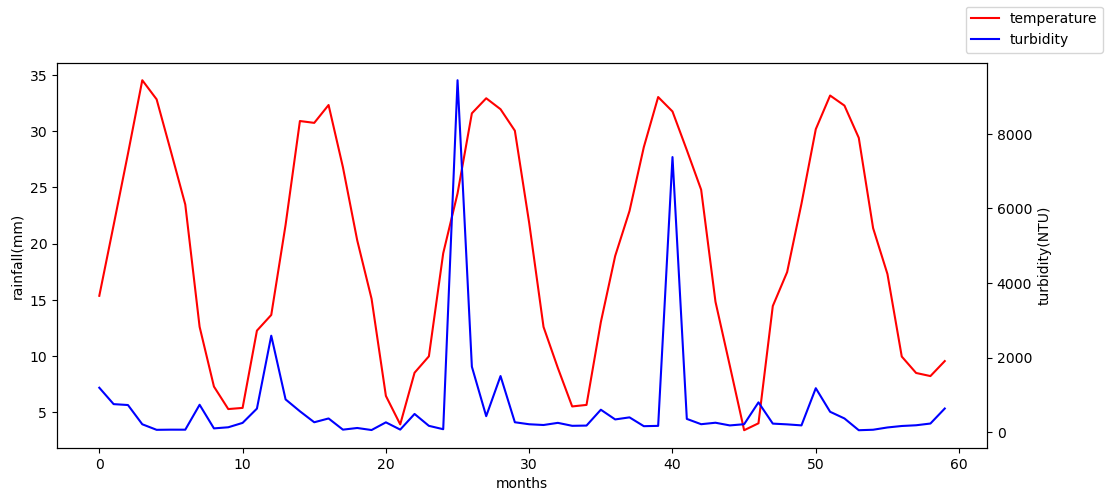

In [59]:
fig,ax1 = plt.subplots(figsize=[12,5])
ax1.plot(data_av['دمای متوسط'],color='red',label='temperature')
ax1.set_xlabel('months')
ax1.set_ylabel('rainfall(mm)')
ax2 = ax1.twinx()
ax2.plot(data_av['کدورت متوسط'],color='blue',label='turbidity')
ax2.set_ylabel('turbidity(NTU)')
fig.legend()

In [60]:
X = data_av['مجموع بارش']
y = data_av['کدورت متوسط']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
neuralNetRegressor = MLPRegressor([200])
neuralNetRegressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = neuralNetRegressor.predict(X_test.to_numpy().reshape(-1,1))
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')


X = data_av[['دمای متوسط','مجموع بارش']]
y = data_av['کدورت متوسط']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
neuralNetRegressor = MLPRegressor([200])
neuralNetRegressor.fit(X_train,y_train)
y_pred = neuralNetRegressor.predict(X_test)
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

mean squared value is: 4801074.339630252 

r2 score is: -52.31233701359822

 
 mean squared value is: 4576901.18077013 

r2 score is: -62.28176799636393


C:\Users\Fani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
